In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
%matplotlib inline
import importlib

from tqdm import tqdm, tnrange

In [2]:
df = pd.read_hdf('dataset/binance_data_train.h5', 'STW')
sample_len   = 480
obs_data_len = 192
step_len     = 1
n_action_intervals = 5
device = "cuda:3"

In [3]:
import DQNTradingAgent.dqn_agent as dqn_agent
from custom_hyperparameters import hyperparams
from envs.trading_env_integrated import TradingEnv

## draw fee_rate list

In [4]:
env_name = ["bollinger", "macd", "stochastic", "rsi","0.000","0.003",'0.005']

In [5]:
def fee_rate_list(env_name, agent_num =1):
    load_location = 'saves/transfer/{}/{}'.format(env_name,agent_num)
    class args():
        def __init__(self, name):
            self.environment=name
    args = args(env_name)
    env = TradingEnv(custom_args=args, env_id='custom_trading_env', obs_data_len=obs_data_len, step_len=step_len, sample_len=sample_len,
                               df=df, fee=0.001, initial_budget=1, n_action_intervals=n_action_intervals, deal_col_name='c', sell_at_end=True,
                               feature_names=['o', 'h','l','c','v',
                                              'num_trades', 'taker_base_vol'])
    agent = dqn_agent.Agent(action_size=2 * n_action_intervals + 1, obs_len=obs_data_len, num_features=env.reset().shape[-1], **hyperparams)
    agent.qnetwork_local.load_state_dict(torch.load(os.path.join(load_location, 'TradingGym_Rainbow_400.pth'), map_location=device))
    agent.qnetwork_local.to(device)
    agent.qnetwork_local.eval()
    
    state = env.reset()
    fee_rate_list = []
    while True:
        action = int(agent.act(state, eps=0.))
        next_state, reward, done, _ ,fee_rate= env.step(action)
        state = next_state
        fee_rate_list.append(fee_rate)
        if done:
            break
        
    return fee_rate_list

In [6]:
fee_rate_list_table={}
for i in tnrange(len(env_name), desc= "env"):
    env = env_name[i]
    for agent_num in tnrange(1,31, desc=f"agent num"):       
        fee_rate_list_= fee_rate_list(env,agent_num)

    
    fee_rate_list_table[env] = fee_rate_list_

[2019-09-06 20:27:36,568] Making new env: custom_trading_env
/home/jeffrey/Binanace_trading_simulation/agent/DQN/envs/trading_env_integrated.py:108: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  self.price = self.df_sample[self.price_name].as_matrix()
/home/jeffrey/Binanace_trading_simulation/agent/DQN/envs/trading_env_integrated.py:110: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  self.obs_features = self.df_sample[self.using_feature].as_matrix()
[2019-09-06 20:27:41,608] Making new env: custom_trading_env
[2019-09-06 20:27:43,278] Making new env: custom_trading_env
[2019-09-06 20:27:44,905] Making new env: custom_trading_env
[2019-09-06 20:27:46,450] Making new env: custom_trading_env
[2019-09-06 20:27:48,012] Making new env: custom_trading_env
[2019-09-06 20:27:49,599] Making new env: custom_trading_env
[2019-09-06 20:27:51,137] Making new env: custom_trading_env
[2019-09-06 20:27:52,678] 

[2019-09-06 20:28:27,341] Making new env: custom_trading_env
[2019-09-06 20:28:28,711] Making new env: custom_trading_env
[2019-09-06 20:28:30,015] Making new env: custom_trading_env
[2019-09-06 20:28:31,370] Making new env: custom_trading_env
[2019-09-06 20:28:32,709] Making new env: custom_trading_env
[2019-09-06 20:28:34,029] Making new env: custom_trading_env
[2019-09-06 20:28:35,328] Making new env: custom_trading_env
[2019-09-06 20:28:36,695] Making new env: custom_trading_env
[2019-09-06 20:28:37,989] Making new env: custom_trading_env
[2019-09-06 20:28:39,317] Making new env: custom_trading_env
[2019-09-06 20:28:40,662] Making new env: custom_trading_env
[2019-09-06 20:28:41,995] Making new env: custom_trading_env
[2019-09-06 20:28:43,284] Making new env: custom_trading_env
[2019-09-06 20:28:44,621] Making new env: custom_trading_env
[2019-09-06 20:28:45,940] Making new env: custom_trading_env
[2019-09-06 20:28:47,250] Making new env: custom_trading_env
[2019-09-06 20:28:48,528

[2019-09-06 20:29:07,241] Making new env: custom_trading_env
[2019-09-06 20:29:08,669] Making new env: custom_trading_env
[2019-09-06 20:29:10,140] Making new env: custom_trading_env
[2019-09-06 20:29:11,577] Making new env: custom_trading_env
[2019-09-06 20:29:12,975] Making new env: custom_trading_env
[2019-09-06 20:29:14,426] Making new env: custom_trading_env
[2019-09-06 20:29:15,807] Making new env: custom_trading_env
[2019-09-06 20:29:17,196] Making new env: custom_trading_env
[2019-09-06 20:29:18,645] Making new env: custom_trading_env
[2019-09-06 20:29:20,076] Making new env: custom_trading_env
[2019-09-06 20:29:21,504] Making new env: custom_trading_env
[2019-09-06 20:29:22,931] Making new env: custom_trading_env
[2019-09-06 20:29:24,356] Making new env: custom_trading_env
[2019-09-06 20:29:25,807] Making new env: custom_trading_env
[2019-09-06 20:29:27,254] Making new env: custom_trading_env
[2019-09-06 20:29:28,709] Making new env: custom_trading_env
[2019-09-06 20:29:30,139

[2019-09-06 20:29:50,264] Making new env: custom_trading_env
[2019-09-06 20:29:52,423] Making new env: custom_trading_env
[2019-09-06 20:29:54,590] Making new env: custom_trading_env
[2019-09-06 20:29:56,868] Making new env: custom_trading_env
[2019-09-06 20:29:59,119] Making new env: custom_trading_env
[2019-09-06 20:30:01,251] Making new env: custom_trading_env
[2019-09-06 20:30:03,456] Making new env: custom_trading_env
[2019-09-06 20:30:05,631] Making new env: custom_trading_env
[2019-09-06 20:30:07,792] Making new env: custom_trading_env
[2019-09-06 20:30:10,019] Making new env: custom_trading_env
[2019-09-06 20:30:12,243] Making new env: custom_trading_env
[2019-09-06 20:30:14,429] Making new env: custom_trading_env
[2019-09-06 20:30:16,683] Making new env: custom_trading_env
[2019-09-06 20:30:18,903] Making new env: custom_trading_env
[2019-09-06 20:30:21,119] Making new env: custom_trading_env
[2019-09-06 20:30:23,294] Making new env: custom_trading_env
[2019-09-06 20:30:25,449

[2019-09-06 20:30:56,211] Making new env: custom_trading_env
[2019-09-06 20:30:57,144] Making new env: custom_trading_env
[2019-09-06 20:30:58,118] Making new env: custom_trading_env
[2019-09-06 20:30:59,072] Making new env: custom_trading_env
[2019-09-06 20:31:00,029] Making new env: custom_trading_env
[2019-09-06 20:31:01,028] Making new env: custom_trading_env
[2019-09-06 20:31:02,007] Making new env: custom_trading_env
[2019-09-06 20:31:02,974] Making new env: custom_trading_env
[2019-09-06 20:31:03,938] Making new env: custom_trading_env
[2019-09-06 20:31:04,872] Making new env: custom_trading_env
[2019-09-06 20:31:05,822] Making new env: custom_trading_env
[2019-09-06 20:31:06,783] Making new env: custom_trading_env
[2019-09-06 20:31:07,730] Making new env: custom_trading_env
[2019-09-06 20:31:08,690] Making new env: custom_trading_env
[2019-09-06 20:31:09,653] Making new env: custom_trading_env
[2019-09-06 20:31:10,614] Making new env: custom_trading_env
[2019-09-06 20:31:11,581

[2019-09-06 20:31:25,099] Making new env: custom_trading_env
[2019-09-06 20:31:26,035] Making new env: custom_trading_env
[2019-09-06 20:31:26,960] Making new env: custom_trading_env
[2019-09-06 20:31:27,938] Making new env: custom_trading_env
[2019-09-06 20:31:28,975] Making new env: custom_trading_env
[2019-09-06 20:31:29,931] Making new env: custom_trading_env
[2019-09-06 20:31:30,925] Making new env: custom_trading_env
[2019-09-06 20:31:31,893] Making new env: custom_trading_env
[2019-09-06 20:31:32,851] Making new env: custom_trading_env
[2019-09-06 20:31:33,812] Making new env: custom_trading_env
[2019-09-06 20:31:34,779] Making new env: custom_trading_env
[2019-09-06 20:31:35,743] Making new env: custom_trading_env
[2019-09-06 20:31:36,674] Making new env: custom_trading_env
[2019-09-06 20:31:37,625] Making new env: custom_trading_env
[2019-09-06 20:31:38,593] Making new env: custom_trading_env
[2019-09-06 20:31:39,566] Making new env: custom_trading_env
[2019-09-06 20:31:40,529

[2019-09-06 20:31:54,201] Making new env: custom_trading_env
[2019-09-06 20:31:55,154] Making new env: custom_trading_env
[2019-09-06 20:31:56,111] Making new env: custom_trading_env
[2019-09-06 20:31:57,061] Making new env: custom_trading_env
[2019-09-06 20:31:58,029] Making new env: custom_trading_env
[2019-09-06 20:31:59,008] Making new env: custom_trading_env
[2019-09-06 20:31:59,962] Making new env: custom_trading_env
[2019-09-06 20:32:00,962] Making new env: custom_trading_env
[2019-09-06 20:32:01,925] Making new env: custom_trading_env
[2019-09-06 20:32:02,904] Making new env: custom_trading_env
[2019-09-06 20:32:03,852] Making new env: custom_trading_env
[2019-09-06 20:32:04,842] Making new env: custom_trading_env
[2019-09-06 20:32:05,819] Making new env: custom_trading_env
[2019-09-06 20:32:06,814] Making new env: custom_trading_env
[2019-09-06 20:32:07,804] Making new env: custom_trading_env
[2019-09-06 20:32:08,772] Making new env: custom_trading_env
[2019-09-06 20:32:09,769

In [7]:
fee_rate_list_table.keys()

dict_keys(['bollinger', 'macd', 'stochastic', 'rsi', '0.000', '0.003', '0.005'])

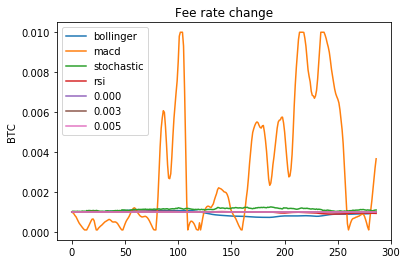

In [17]:
# compare plot
%matplotlib inline
for env in env_name:
#     if env=="macd":
#         continue
    plt.plot( fee_rate_list_table[env], label = env)
plt.title("Fee rate change")
plt.ylabel("Fee rate")
plt.legend()
plt.show()


In [9]:
import pickle

In [10]:
with open("saves/fee_rate_dict.pkl",'wb') as f:
    pickle.dump(fee_rate_list_table,f)

## draw total fee and volume 

In [19]:
def load_agent_and_run(env_name, agent_num, fee=0.001):

    load_location = 'saves/transfer/{}/{}'.format(env_name,agent_num)
    class args():
        def __init__(self, name,fee=0.001):
            self.environment=name
            self.fee = fee
    args = args(env_name, fee)
    env = TradingEnv(custom_args=args, env_id='custom_trading_env', obs_data_len=obs_data_len, step_len=step_len, sample_len=sample_len,
                               df=df, fee=args.fee, initial_budget=1, n_action_intervals=n_action_intervals, deal_col_name='c', sell_at_end=True,
                               feature_names=['o', 'h','l','c','v',
                                              'num_trades', 'taker_base_vol'])
    agent = dqn_agent.Agent(action_size=2 * n_action_intervals + 1, obs_len=obs_data_len, num_features=env.reset().shape[-1], **hyperparams)
    agent.qnetwork_local.load_state_dict(torch.load(os.path.join(load_location, 'TradingGym_Rainbow_400.pth'), map_location=device))
    agent.qnetwork_local.to(device)
    agent.qnetwork_local.eval()
    
    state = env.reset()
    while True:
        action = int(agent.act(state, eps=0.))
        next_state, reward, done, _ ,fee_rate= env.step(action)
        state = next_state
        if done:
            break
        
    return env.total_fee, env.total_volume





In [20]:
fee_table = {}
volume_table = {}

In [22]:
fee_table.keys()

dict_keys(['bollinger', 'macd', 'stochastic', 'rsi'])

In [24]:
for i in tnrange(len(env_name), desc= "env"):
    env = env_name[i]
    
    env_fee = 0.
    env_volume = 0.
    for agent_num in tnrange(1,31, desc=f"agent num"):
        if env in ["0.000","0.003","0.005"]:
            fee, volume= load_agent_and_run(env,agent_num, float(env))
        else:
            fee, volume= load_agent_and_run(env,agent_num)
        env_fee+=fee
        env_volume+=volume
    
    fee_table[env] = env_fee
    volume_table[env] = env_volume

[2019-09-06 20:41:30,454] Making new env: custom_trading_env
[2019-09-06 20:41:32,153] Making new env: custom_trading_env
[2019-09-06 20:41:33,813] Making new env: custom_trading_env
[2019-09-06 20:41:35,437] Making new env: custom_trading_env
[2019-09-06 20:41:37,109] Making new env: custom_trading_env
[2019-09-06 20:41:38,675] Making new env: custom_trading_env
[2019-09-06 20:41:40,341] Making new env: custom_trading_env
[2019-09-06 20:41:41,949] Making new env: custom_trading_env
[2019-09-06 20:41:43,563] Making new env: custom_trading_env
[2019-09-06 20:41:45,182] Making new env: custom_trading_env
[2019-09-06 20:41:46,791] Making new env: custom_trading_env
[2019-09-06 20:41:48,473] Making new env: custom_trading_env
[2019-09-06 20:41:50,158] Making new env: custom_trading_env
[2019-09-06 20:41:51,872] Making new env: custom_trading_env
[2019-09-06 20:41:53,557] Making new env: custom_trading_env
[2019-09-06 20:41:55,266] Making new env: custom_trading_env
[2019-09-06 20:41:56,970

[2019-09-06 20:42:19,897] Making new env: custom_trading_env
[2019-09-06 20:42:21,188] Making new env: custom_trading_env
[2019-09-06 20:42:22,532] Making new env: custom_trading_env
[2019-09-06 20:42:23,937] Making new env: custom_trading_env
[2019-09-06 20:42:25,293] Making new env: custom_trading_env
[2019-09-06 20:42:26,689] Making new env: custom_trading_env
[2019-09-06 20:42:28,029] Making new env: custom_trading_env
[2019-09-06 20:42:29,392] Making new env: custom_trading_env
[2019-09-06 20:42:30,786] Making new env: custom_trading_env
[2019-09-06 20:42:32,150] Making new env: custom_trading_env
[2019-09-06 20:42:33,523] Making new env: custom_trading_env
[2019-09-06 20:42:34,897] Making new env: custom_trading_env
[2019-09-06 20:42:36,265] Making new env: custom_trading_env
[2019-09-06 20:42:37,671] Making new env: custom_trading_env
[2019-09-06 20:42:39,052] Making new env: custom_trading_env
[2019-09-06 20:42:40,377] Making new env: custom_trading_env
[2019-09-06 20:42:41,749

[2019-09-06 20:43:00,987] Making new env: custom_trading_env
[2019-09-06 20:43:02,491] Making new env: custom_trading_env
[2019-09-06 20:43:03,994] Making new env: custom_trading_env
[2019-09-06 20:43:05,486] Making new env: custom_trading_env
[2019-09-06 20:43:06,937] Making new env: custom_trading_env
[2019-09-06 20:43:08,452] Making new env: custom_trading_env
[2019-09-06 20:43:09,932] Making new env: custom_trading_env
[2019-09-06 20:43:11,378] Making new env: custom_trading_env
[2019-09-06 20:43:12,830] Making new env: custom_trading_env
[2019-09-06 20:43:14,259] Making new env: custom_trading_env
[2019-09-06 20:43:15,771] Making new env: custom_trading_env
[2019-09-06 20:43:17,272] Making new env: custom_trading_env
[2019-09-06 20:43:18,829] Making new env: custom_trading_env
[2019-09-06 20:43:20,257] Making new env: custom_trading_env
[2019-09-06 20:43:21,719] Making new env: custom_trading_env
[2019-09-06 20:43:23,185] Making new env: custom_trading_env
[2019-09-06 20:43:24,655

[2019-09-06 20:43:45,566] Making new env: custom_trading_env
[2019-09-06 20:43:47,919] Making new env: custom_trading_env
[2019-09-06 20:43:50,188] Making new env: custom_trading_env
[2019-09-06 20:43:52,485] Making new env: custom_trading_env
[2019-09-06 20:43:54,701] Making new env: custom_trading_env
[2019-09-06 20:43:56,950] Making new env: custom_trading_env
[2019-09-06 20:43:59,338] Making new env: custom_trading_env
[2019-09-06 20:44:01,646] Making new env: custom_trading_env
[2019-09-06 20:44:03,997] Making new env: custom_trading_env
[2019-09-06 20:44:06,354] Making new env: custom_trading_env
[2019-09-06 20:44:08,682] Making new env: custom_trading_env
[2019-09-06 20:44:10,900] Making new env: custom_trading_env
[2019-09-06 20:44:13,145] Making new env: custom_trading_env
[2019-09-06 20:44:15,355] Making new env: custom_trading_env
[2019-09-06 20:44:17,532] Making new env: custom_trading_env
[2019-09-06 20:44:19,728] Making new env: custom_trading_env
[2019-09-06 20:44:21,972

[2019-09-06 20:44:53,179] Making new env: custom_trading_env
[2019-09-06 20:44:54,128] Making new env: custom_trading_env
[2019-09-06 20:44:55,085] Making new env: custom_trading_env
[2019-09-06 20:44:56,024] Making new env: custom_trading_env
[2019-09-06 20:44:56,996] Making new env: custom_trading_env
[2019-09-06 20:44:57,979] Making new env: custom_trading_env
[2019-09-06 20:44:58,958] Making new env: custom_trading_env
[2019-09-06 20:44:59,943] Making new env: custom_trading_env
[2019-09-06 20:45:00,919] Making new env: custom_trading_env
[2019-09-06 20:45:01,898] Making new env: custom_trading_env
[2019-09-06 20:45:02,891] Making new env: custom_trading_env
[2019-09-06 20:45:03,879] Making new env: custom_trading_env
[2019-09-06 20:45:04,842] Making new env: custom_trading_env
[2019-09-06 20:45:05,799] Making new env: custom_trading_env
[2019-09-06 20:45:06,793] Making new env: custom_trading_env
[2019-09-06 20:45:07,745] Making new env: custom_trading_env
[2019-09-06 20:45:08,701

[2019-09-06 20:45:22,186] Making new env: custom_trading_env
[2019-09-06 20:45:23,120] Making new env: custom_trading_env
[2019-09-06 20:45:24,095] Making new env: custom_trading_env
[2019-09-06 20:45:25,060] Making new env: custom_trading_env
[2019-09-06 20:45:26,041] Making new env: custom_trading_env
[2019-09-06 20:45:27,022] Making new env: custom_trading_env
[2019-09-06 20:45:27,941] Making new env: custom_trading_env
[2019-09-06 20:45:28,884] Making new env: custom_trading_env
[2019-09-06 20:45:29,863] Making new env: custom_trading_env
[2019-09-06 20:45:30,832] Making new env: custom_trading_env
[2019-09-06 20:45:31,805] Making new env: custom_trading_env
[2019-09-06 20:45:32,778] Making new env: custom_trading_env
[2019-09-06 20:45:33,731] Making new env: custom_trading_env
[2019-09-06 20:45:34,686] Making new env: custom_trading_env
[2019-09-06 20:45:35,652] Making new env: custom_trading_env
[2019-09-06 20:45:36,651] Making new env: custom_trading_env
[2019-09-06 20:45:37,627

[2019-09-06 20:45:51,359] Making new env: custom_trading_env
[2019-09-06 20:45:52,336] Making new env: custom_trading_env
[2019-09-06 20:45:53,307] Making new env: custom_trading_env
[2019-09-06 20:45:54,297] Making new env: custom_trading_env
[2019-09-06 20:45:55,274] Making new env: custom_trading_env
[2019-09-06 20:45:56,207] Making new env: custom_trading_env
[2019-09-06 20:45:57,182] Making new env: custom_trading_env
[2019-09-06 20:45:58,159] Making new env: custom_trading_env
[2019-09-06 20:45:59,132] Making new env: custom_trading_env
[2019-09-06 20:46:00,120] Making new env: custom_trading_env
[2019-09-06 20:46:01,102] Making new env: custom_trading_env
[2019-09-06 20:46:02,107] Making new env: custom_trading_env
[2019-09-06 20:46:03,095] Making new env: custom_trading_env
[2019-09-06 20:46:04,086] Making new env: custom_trading_env
[2019-09-06 20:46:05,069] Making new env: custom_trading_env
[2019-09-06 20:46:06,050] Making new env: custom_trading_env
[2019-09-06 20:46:07,056

In [25]:
env_fee

0.10164514765703969

In [26]:
env_volume

29173.760317489563

#load fee_table and volume_table
import pickle
with open('fee_table.pkl','rb') as f:
    fee_table_ = pickle.load(f)
with open('volume_table.pkl','rb') as f:
    volume_table_ = pickle.load(f)

fee_table = {**fee_table, **fee_table_}
fee_table

volume_table = {**volume_table, **volume_table_}
volume_table

In [27]:
%matplotlib inline

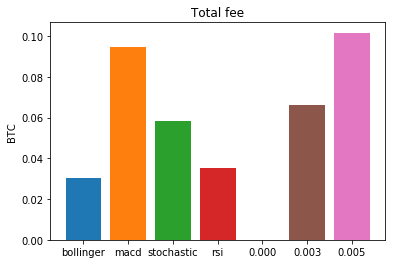

In [28]:
# compare plot
# env_name = ["bollinger", "macd", "stochastic", "rsi","0.003",'0.005']
for env in env_name:
    plt.bar(x = env, height = fee_table[env])
plt.title("Total fee")
plt.ylabel("BTC")
plt.show()


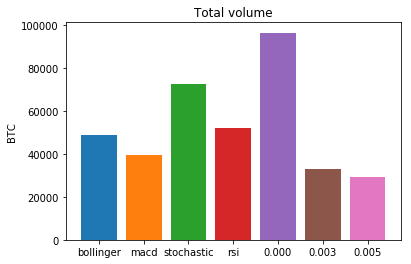

In [29]:
# compare plot
for env in env_name:
    plt.bar(x = env, height = volume_table[env])
plt.title("Total volume")
plt.ylabel("BTC")
plt.show()


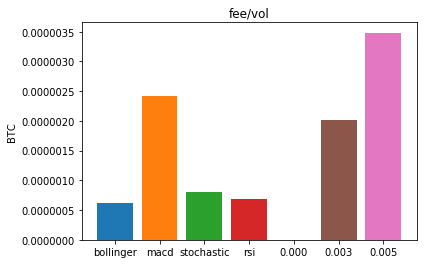

In [30]:
avg_fee_table=dict(zip(fee_table.keys(),np.array(list(fee_table.values()))/np.array(list(volume_table.values()))))
for env in env_name:
    plt.bar(x = env, height = avg_fee_table[env])
plt.title("fee/vol")
plt.ylabel("BTC")
plt.show()

In [31]:
# save
import pickle

with open("fee_table.pkl",'wb') as f:
    pickle.dump(fee_table, f)

with open("volume_table.pkl",'wb') as f:
    pickle.dump(volume_table, f)